In [1]:
#Parkison's Disease Detection Dataset
"""
Created by  Max Little, Oxford University 
in collaboration with National centre for voice and speech,  Denver, Colorado

Date Donated: 2008-06-26

Citation: 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 
Little MA, McSharry PE, Roberts SJ, Costello DAE, Moroz IM. 
BioMedical Engineering OnLine 2007, 6:23 (26 June 2007)
"""

#Data Set Characteristics
"""
Number of Instances: 197
Number of Attributes: 23
Attribute Characteristics: Real
Missing Values: None
"""

#Attribute Information:
"""
Matrix column entries (attributes):
Name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 
"""

"""
MDVP: Multidimensional Voice Program is a software that calculates 33 measures to analyze the fidelity of human voice
http://www.scielo.br/scielo.php?pid=S1516-18462015000401341&script=sci_arttext&tlng=en
"""

"""
Definition of key metrics:

Jitter: Random variation of phase causing uncertainity in signal frequency
- RAP: Relative average perturbation, avg difference between a period and the average of it and its two neighbors      
- PPQ: Period perturbation quotient, avg difference between a period and the average of it and 5 of its neighbors
- DDP: Average absolute difference of differences between jitter cycles

Shimmer: Variability of peak-peak amplitude in dB
- APQ3: 3-point amplitude perturbation quotient, 
- APQ5: 5-point amplitude perturbation quotient
- DDA: Average absolute difference between amplitudes of different period

NHR: Noise to harmonics ratio
HNR: Harmonics to Noise ratio

RPDE: Recurrence priod density entropy  measure
D2: Correlation dimension

PPE: Pitch Period Entropy

https://www.cs.upc.edu/~nlp/papers/far_jit_07.pdf
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5434464/

"""

#Data Set Information & Classification Task
"""
This dataset is composed of a range of biomedical voice measurements from 
31 people, 23 with Parkinson's disease (PD). Each column in the table is a 
particular voice measure, and each row corresponds one of 195 voice 
recording from these individuals ("name" column). The main aim of the data 
is to discriminate healthy people from those with PD, according to "status" 
column which is set to 0 for healthy and 1 for PD.
"""

'\nThis dataset is composed of a range of biomedical voice measurements from \n31 people, 23 with Parkinson\'s disease (PD). Each column in the table is a \nparticular voice measure, and each row corresponds one of 195 voice \nrecording from these individuals ("name" column). The main aim of the data \nis to discriminate healthy people from those with PD, according to "status" \ncolumn which is set to 0 for healthy and 1 for PD.\n'

# Homework goals:

### 1. Explore more correlation methods & classifiers in Sklearn beyond the ones taught in class

### 2. Investigate impact of Standardization on data set and classification accuracy

### 3. Investigate dimensionality reduction by combining attributes of reasonable similarity

###  Goal 1: Exploring classifiers & correlation methods

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing several classifiers based on Sklearn documentation
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# To display all columns and all rows if necessary
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)

%matplotlib inline

In [3]:
# Read csv file & review data types
df = pd.read_csv("parkinsons.csv")
df.head(5)
#df.dtypes

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
# Renamed column headers to make them somewhat more readable from engineering perspective
col_list = ["Subject ID","F0avg","Fmax","Fmin","Jitter%","Jitter:Abs","Jitter:RAP","Jitter:PPQ","Jitter:DDP", "Shimmer","Shimmer:dB", "Shimmer:APQ3","Shimmer:APQ5","Shimmer:APQ","Shimmer:DDA","NHR","HNR","Result","RPDE","DFA","Spread1","Spread2","D2","PPE"]
dfx = pd.read_csv("parkinsons.csv",skiprows=1, names=col_list)
dfx

,Subject ID,F0avg,Fmax,Fmin,Jitter%,Jitter:Abs,Jitter:RAP,Jitter:PPQ,Jitter:DDP,Shimmer,Shimmer:dB,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ,Shimmer:DDA,NHR,HNR,Result,RPDE,DFA,Spread1,Spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [5]:
# Move the classifier result to end of the data frame 
dfx.drop(dfx.columns[0], axis=1,inplace=True)
dfx[[col for col in dfx if col not in ['Result']] + ['Result']].head(5)

,F0avg,Fmax,Fmin,Jitter%,Jitter:Abs,Jitter:RAP,Jitter:PPQ,Jitter:DDP,Shimmer,Shimmer:dB,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,Spread1,Spread2,D2,PPE,Result
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [6]:
dfx.describe()

,F0avg,Fmax,Fmin,Jitter%,Jitter:Abs,Jitter:RAP,Jitter:PPQ,Jitter:DDP,Shimmer,Shimmer:dB,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ,Shimmer:DDA,NHR,HNR,Result,RPDE,DFA,Spread1,Spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
dfx.corr(method='pearson').sort_values('Result', ascending=False).head(20).loc[:,'Result']

Result          1.000000
Spread1         0.564838
PPE             0.531039
Spread2         0.454842
Shimmer         0.367430
Shimmer:APQ     0.364316
Shimmer:APQ5    0.351148
Shimmer:dB      0.350697
Shimmer:APQ3    0.347617
Shimmer:DDA     0.347608
D2              0.340232
Jitter:Abs      0.338653
RPDE            0.308567
Jitter:PPQ      0.288698
Jitter%         0.278220
Jitter:RAP      0.266668
Jitter:DDP      0.266646
DFA             0.231739
NHR             0.189429
Fmax           -0.166136
Name: Result, dtype: float64

In [8]:
dfx.corr(method='kendall').sort_values('Result', ascending=False).head(20).loc[:,'Result']

Result          1.000000
PPE             0.484909
Spread1         0.484909
Shimmer:APQ     0.398153
Spread2         0.383125
Jitter:Abs      0.376928
Jitter:PPQ      0.351162
Shimmer:dB      0.348794
Shimmer         0.345439
Jitter%         0.339453
Jitter:DDP      0.339026
Jitter:RAP      0.338734
NHR             0.333777
Shimmer:APQ5    0.329760
Shimmer:APQ3    0.311361
Shimmer:DDA     0.311146
D2              0.274742
RPDE            0.253102
DFA             0.182988
Fmax           -0.213630
Name: Result, dtype: float64

In [9]:
dfx.corr(method='spearman').sort_values('Result', ascending=False).head(20).loc[:,'Result']

Result          1.000000
PPE             0.592373
Spread1         0.592373
Shimmer:APQ     0.486314
Spread2         0.468020
Jitter:Abs      0.435938
Jitter:PPQ      0.428585
Shimmer:dB      0.425419
Shimmer         0.421917
Jitter%         0.414412
Jitter:DDP      0.413987
Jitter:RAP      0.413255
NHR             0.407642
Shimmer:APQ5    0.402777
Shimmer:APQ3    0.380254
Shimmer:DDA     0.380042
D2              0.335629
RPDE            0.309193
DFA             0.223541
Fmax           -0.260974
Name: Result, dtype: float64

In [10]:
### Documentation shows that Spearman/kendal is better for ordinal scales while Pearson is better for interval scales.

### We are dealing with nominal data that is a step below ordinal scaled data

### 

# https://www.questionpro.com/blog/nominal-ordinal-interval-ratio/

In [11]:
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]

column_index(dfx, ['Spread1', 'PPE', 'Shimmer:APQ', 'Spread2', 'Jitter:Abs','Jitter:PPQ'])

#dfx.columns.get_loc("PPE")

array([19, 22, 12, 20,  4,  6])

In [12]:
Predictors = np.array(dfx[[col for col in dfx if col not in ['Result']]])
target = np.array(dfx['Result'])
print (target)
print ('\n')
print (Predictors)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]


[[1.199920e+02 1.573020e+02 7.499700e+01 ... 2.664820e-01 2.301442e+00
  2.846540e-01]
 [1.224000e+02 1.486500e+02 1.138190e+02 ... 3.355900e-01 2.486855e+00
  3.686740e-01]
 [1.166820e+02 1.311110e+02 1.115550e+02 ... 3.111730e-01 2.342259e+00
  3.326340e-01]
 ...
 [1.746880e+02 2.400050e+02 7.428700e+01 ... 1.584530e-01 2.679772e+00
  1.317280e-01]
 [1.987640e+02 3.969610e+02 7.490400e+01 ... 2.074540e-01 2.138608e+00
  1.233060e-01]
 [2.142890e+02 2.602770e+02 7.797300e+01 ... 1.906670e-01 2.555477e+00
  1.485690e-01]]


[197.076 199.228 198.383 202.266 203.184 201.464 237.226 241.404 243.439
 242.852 245.51  252.455 122.188 122.964 124.445 126.344 128.001 129.336
 209.144 223.365 222.236 228.832 229.401 228.969 236.2   237.323 260.105
 197.569 240.301 244.99  112.547 110.739 113.715 117.004 115.38  116.388
 117.226 116.848 116.286 116.556 116.342 114.563 201.774 174.188 209.516
 174.688 198.764 214.289]
[119.992 122.4   116.682 116.676 116.014 120.552 120.267 107.332  95.73
  95.056  88.333  91.904 136.926 139.173 152.845 142.167 144.188 168.778
 153.046 156.405 153.848 153.88  167.93  173.917 163.656 104.4   171.041
 146.845 155.358 162.568 177.876 176.17  180.198 187.733 186.163 184.055
 108.807 109.86  110.417 117.274 116.879 114.847 140.341 136.969 143.533
 148.09  142.729 136.358 120.08  112.014 110.793 110.707 112.876 110.568
  95.385 100.77   96.106  95.605 100.96   98.804 176.858 180.978 178.222
 176.281 173.898 179.711 166.605 151.955 148.272 152.125 157.821 157.447
 159.116 125.036 125.791 1

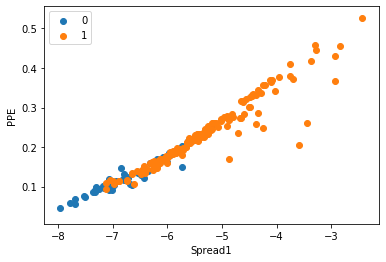

In [13]:
f, ax = plt.subplots(1)
for i in np.unique(target):
    mask = (target == i)
    print(Predictors[mask,0])
    plt.scatter(Predictors[mask, 18], Predictors[mask, 21], label=i)
ax.legend()
plt.xlabel('Spread1')
plt.ylabel('PPE')
plt.show()

[-7.3483   -7.682587 -7.067931 -7.695734 -7.964984 -7.777685 -7.31055
 -6.793547 -7.057869 -6.99582  -7.156076 -7.31951  -6.439398 -6.482096
 -6.650471 -6.689151 -7.072419 -6.836811 -7.040508 -7.293801 -6.966321
 -7.24562  -7.496264 -7.314237 -6.816086 -7.018057 -7.517934 -5.736781
 -7.169701 -7.3045   -6.323531 -6.085567 -5.943501 -6.012559 -5.966779
 -6.016891 -5.61907  -5.198864 -5.592584 -6.431119 -6.359018 -6.710219
 -6.934474 -6.538586 -6.195325 -6.787197 -6.744577 -5.724056]
[-4.813031 -4.075192 -4.443179 -4.117501 -3.747787 -4.242867 -5.634322
 -6.167603 -5.498678 -5.011879 -5.24977  -4.960234 -6.547148 -5.660217
 -6.105098 -5.340115 -5.44004  -2.93107  -3.949079 -4.554466 -4.095442
 -5.18696  -4.330956 -5.248776 -5.557447 -5.571843 -6.18359  -6.27169
 -7.120925 -6.635729 -6.149653 -6.006414 -6.452058 -6.006647 -6.647379
 -7.044105 -4.649573 -4.333543 -4.438453 -4.60826  -4.476755 -4.609161
 -5.409423 -5.324574 -5.86975  -6.261141 -5.720868 -5.207985 -5.79182
 -5.389129 -5.3133

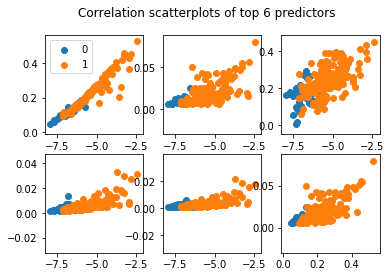

<Figure size 432x432 with 0 Axes>

In [14]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3)
fig.suptitle('Correlation scatterplots of top 6 predictors')
fig = plt.figure(figsize=(6, 6)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 

for i in np.unique(target):
        mask = (target == i)
        print(Predictors[mask,18])
        ax1.scatter(Predictors[mask, 18], Predictors[mask, 21], label=i)
        ax2.scatter(Predictors[mask, 18], Predictors[mask, 11], label=i)
        ax3.scatter(Predictors[mask, 18], Predictors[mask, 19], label=i)
        ax4.scatter(Predictors[mask, 18], Predictors[mask, 3], label=i)
        ax5.scatter(Predictors[mask, 18], Predictors[mask, 5], label=i)
        ax6.scatter(Predictors[mask, 21], Predictors[mask, 11], label=i)
ax1.legend()

plt.show()

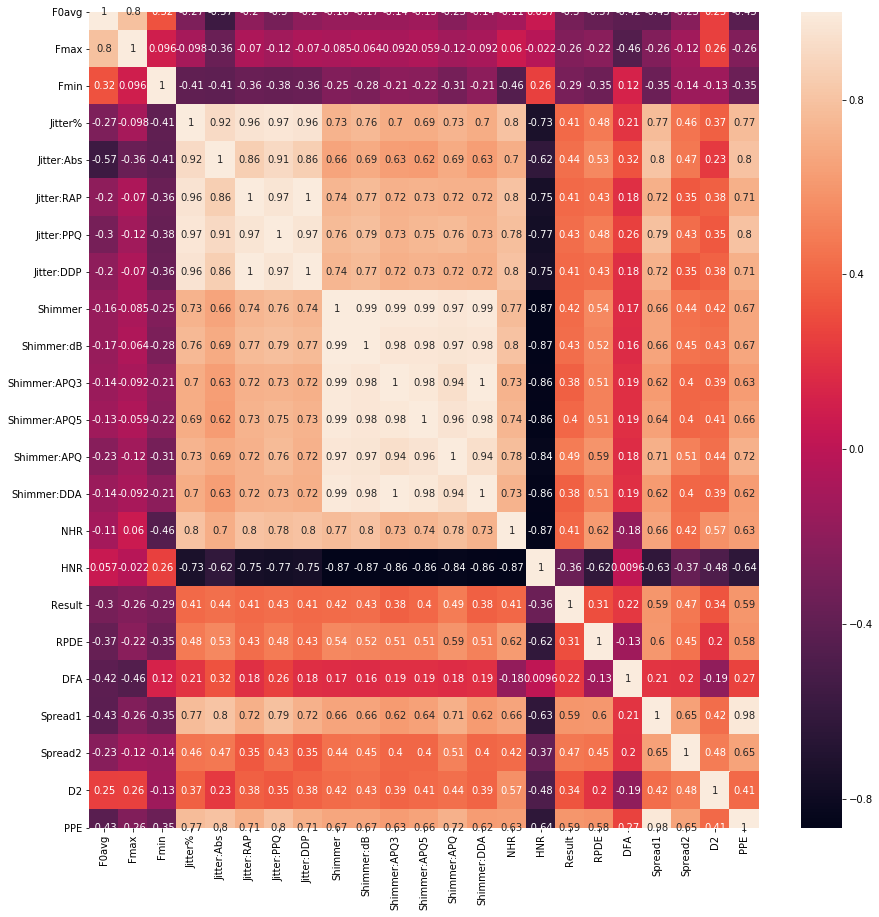

In [15]:
import seaborn as sns 

plt.figure(figsize = (15,15))

# generating correlation heatmap 
sns.heatmap(dfx.corr(method = 'spearman'), annot = True) 
# posting correlation heatmap to output console  
plt.show()

In [16]:
# Logistic Regression
model = LogisticRegression()
model.fit(Predictors,target)     ## note that all 195 rows  of data is being used for training
print(model)

# make predictions
expected = target
predicted = model.predict(Predictors)   

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        48
           1       0.89      0.96      0.92       147

    accuracy                           0.88       195
   macro avg       0.86      0.79      0.82       195
weighted avg       0.87      0.88      0.87       195

[[ 30  18]
 [  6 141]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
# Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(Predictors,target)     ## note that all 195 rows  of data is being used for training
print(model)

# make predictions
expected = target
predicted = model.predict(Predictors)   

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00       147

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195

[[ 48   0]
 [  0 147]]


In [18]:
# Explore different types of classifiers

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(Predictors,target)
    print (name," : ")
    # make predictions
    expected = target
    predicted = model.predict(Predictors)   
    # summarize the fit of the model
    print(metrics.classification_report(expected, predicted))
    print(metrics.confusion_matrix(expected, predicted))
    cm = metrics.confusion_matrix(expected, predicted)
    print("\n")

Nearest Neighbors  : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00       147

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195

[[ 48   0]
 [  0 147]]


Linear SVM  : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00       147

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195

[[ 48   0]
 [  0 147]]


RBF SVM  : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00       147

    accuracy                           1.00       195
   macro avg       1.00      

/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [19]:
# Validate with one positive and one negative row of trained data for sanity check

xxp = [122.4, 148.65,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.33559,2.486855,0.368674]
testp = [xxp]
yyp = model.predict(testp)
print(yyp)

xxn = [242.852,255.034,227.911,0.00225,0.000009,0.00117,0.00139,0.0035,0.01494,0.134,0.00847,0.00879,0.01014,0.02542,0.00476,25.032,0.431285,0.638928,-6.99582,0.102083,2.3658,0.102706]
testn = [xxn]
yyn = model.predict(testn)
print(yyn)

[1]
[0]


In [20]:
# Generate Test data from one row 
xx0 = [i * 0.7 for i in xxp]
xx1 = [i * 2.7 for i in xxp]
xx2 = [i ** 2 for i in xxn]
xx3 = [i + 2.2 for i in xxn]

# test them
multiple_tests=[xx0,xx1,xx2,xx3]
yy = model.predict(multiple_tests)
print(yy)

[1 0 1 0]


### Goal 2: Classification accuracy impact due to standardization & see what happens when different fractions of  data are used for testing vs training

In [21]:
X = Predictors
y = target

In [22]:
# preprocess dataset, split into training and test part 
#X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
print("X_train shape: ",X_train.shape) 
print("y_train shape: ",y_train.shape) 
print("X_test shape: ",X_test.shape) 
print("y_test shape: ",y_test.shape)

X_train shape:  (136, 22)
y_train shape:  (136,)
X_test shape:  (59, 22)
y_test shape:  (59,)


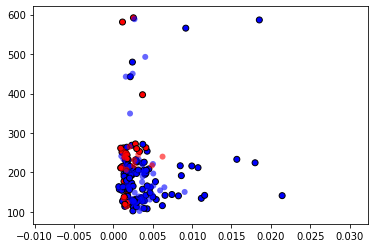

In [23]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(111)

ax.scatter(X_train[:, 5], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
ax.scatter(X_test[:, 5], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors='none')
#ax.set_xlim(xx.min(), xx.max())
#ax.set_ylim(yy.min(), yy.max())
#ax.set_xticks(())
#ax.set_yticks(())

In [24]:
# Explore different types of classifiers

import sys

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]


# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X_train,y_train)
    print (name," : ")
    # make predictions
    expected = y_test
    predicted = clf.predict(X_test)   
    # summarize the fit of the model
    print(metrics.classification_report(expected, predicted))
    print(metrics.confusion_matrix(expected, predicted))
    cm = metrics.confusion_matrix(expected, predicted)
    print("\n")

Nearest Neighbors  : 
              precision    recall  f1-score   support

           0       0.60      0.60      0.60        15
           1       0.86      0.86      0.86        44

    accuracy                           0.80        59
   macro avg       0.73      0.73      0.73        59
weighted avg       0.80      0.80      0.80        59

[[ 9  6]
 [ 6 38]]


Linear SVM  : 
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        15
           1       0.82      0.93      0.87        44

    accuracy                           0.80        59
   macro avg       0.74      0.67      0.69        59
weighted avg       0.78      0.80      0.78        59

[[ 6  9]
 [ 3 41]]


RBF SVM  : 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.75      1.00      0.85        44

    accuracy                           0.75        59
   macro avg       0.37      0.50    

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoost  : 
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59

[[10  5]
 [ 1 43]]


Naive Bayes  : 
              precision    recall  f1-score   support

           0       0.50      0.80      0.62        15
           1       0.91      0.73      0.81        44

    accuracy                           0.75        59
   macro avg       0.71      0.76      0.71        59
weighted avg       0.81      0.75      0.76        59

[[12  3]
 [12 32]]


QDA  : 
              precision    recall  f1-score   support

           0       1.00      0.40      0.57        15
           1       0.83      1.00      0.91        44

    accuracy                           0.85        59
   macro avg       0.92      0.70      0.74      

/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [25]:
## Ran different classifier models (listed above) with different sample test & train sizes 
## (Train:60,70,80,90; Test: 40,30,20,10) over standardized and non-standardized datasets
## Results are summarized in a report

## Goal 3: Investigate dimensionality reduction and impact on accuracy  by combining attributes of reasonable similarity


In [26]:
df2 = dfx.copy()

In [27]:
Features = np.array(df2[[col for col in dfx if col not in ['Result']]])
Target = np.array(df2['Result'])

In [28]:
df3 = pd.DataFrame(Features)

In [29]:
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [30]:
col_list2 = ["F0avg","Fmax","Fmin","Jitter%","Jitter:Abs","Jitter:RAP","Jitter:PPQ","Jitter:DDP", "Shimmer","Shimmer:dB", "Shimmer:APQ3","Shimmer:APQ5","Shimmer:APQ","Shimmer:DDA","NHR","HNR","RPDE","DFA","Spread1","Spread2","D2","PPE"]
df3.columns = col_list2

In [31]:
df3

,F0avg,Fmax,Fmin,Jitter%,Jitter:Abs,Jitter:RAP,Jitter:PPQ,Jitter:DDP,Shimmer,Shimmer:dB,Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,Spread1,Spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.000110,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,120.552,131.162,113.787,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.456,0.02328,0.03526,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,120.267,137.244,114.820,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.140,0.00779,0.00937,0.01351,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,107.332,113.840,104.315,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.134,0.00829,0.00946,0.01256,0.02487,0.00344,26.892,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,95.730,132.068,91.754,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.191,0.01073,0.01277,0.01717,0.03218,0.01070,21.812,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,0.01441,0.01725,0.02444,0.04324,0.01022,21.862,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [32]:
# Store all means and Std Devs for each column in separate lists
cols = list(df3.columns)
Std_z=[]
Mean_z=[]

# For each column calculate its Zscore and append it as a new column in data frame
for col in cols:
    col_zscore = col + '_zscore'
    df3[col_zscore] = (df3[col] - df3[col].mean())/df3[col].std(ddof=0)
    Std_z.append(df3[col].std(ddof=0))
    Mean_z.append(df3[col].mean())

#New data frame containing only Z-scores    
dfZ =  df3.iloc[:,22:44].copy()
cols_z = list(dfZ.columns)
print ("columns : ", cols_z)
print ("std deviation list :", Std_z, len(Std_z))
print ("Mean list :", Mean_z, len(Std_z))

columns :  ['F0avg_zscore', 'Fmax_zscore', 'Fmin_zscore', 'Jitter%_zscore', 'Jitter:Abs_zscore', 'Jitter:RAP_zscore', 'Jitter:PPQ_zscore', 'Jitter:DDP_zscore', 'Shimmer_zscore', 'Shimmer:dB_zscore', 'Shimmer:APQ3_zscore', 'Shimmer:APQ5_zscore', 'Shimmer:APQ_zscore', 'Shimmer:DDA_zscore', 'NHR_zscore', 'HNR_zscore', 'RPDE_zscore', 'DFA_zscore', 'Spread1_zscore', 'Spread2_zscore', 'D2_zscore', 'PPE_zscore']
std deviation list : [41.28379996590652, 91.25665238831346, 43.40967637841881, 0.004835686602250749, 3.473250688973511e-05, 0.002960154957118161, 0.00275189325492869, 0.008880485924417671, 0.018808518603560632, 0.19437696243124428, 0.010127094385571809, 0.011992835897206748, 0.01690322722466955, 0.03038091873884288, 0.04031467829869682, 4.414401569264758, 0.10367485434733356, 0.05519376122810949, 1.0874087661470229, 0.08319162680463385, 0.38181624891282995, 0.0898879502841254] 22
Mean list : [154.22864102564105, 197.104917948718, 116.32463076923077, 0.006220461538461539, 4.39589743589

In [33]:
dfZ.head(20)

,F0avg_zscore,Fmax_zscore,Fmin_zscore,Jitter%_zscore,Jitter:Abs_zscore,Jitter:RAP_zscore,Jitter:PPQ_zscore,Jitter:DDP_zscore,Shimmer_zscore,Shimmer:dB_zscore,Shimmer:APQ3_zscore,Shimmer:APQ5_zscore,Shimmer:APQ_zscore,Shimmer:DDA_zscore,NHR_zscore,HNR_zscore,RPDE_zscore,DFA_zscore,Spread1_zscore,Spread2_zscore,D2_zscore,PPE_zscore
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,0.607859,1.119147,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,1.547912,2.276504,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,1.175643,1.726176,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,1.340547,1.848749,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,1.899444,2.532491,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082
5,-0.815735,-0.722609,-0.058458,0.715418,1.037674,0.447135,1.473037,0.445927,0.919842,0.893875,0.752027,1.449344,0.493901,0.752360,-0.313213,-0.115072,-0.800305,1.938081,1.325656,0.872692,-0.508795,1.682354
6,-0.822638,-0.655962,-0.034661,-0.597735,-0.401899,-0.593351,-0.518319,-0.592304,-0.724625,-0.731832,-0.777533,-0.709445,-0.625412,-0.777548,-0.465763,0.679600,0.940483,0.833662,0.046050,0.374697,-1.380353,0.057898
7,-1.135957,-0.912426,-0.276658,-0.686658,-0.401899,-0.630511,-0.590996,-0.631716,-0.746424,-0.762700,-0.728161,-0.701940,-0.681615,-0.728175,-0.531000,1.134021,1.339616,0.818262,-0.444365,-0.514347,-0.830591,-0.476111
8,-1.416988,-0.712681,-0.566017,-0.146921,0.461845,-0.127159,-0.045917,-0.126113,-0.466763,-0.469455,-0.487223,-0.425942,-0.408886,-0.487563,-0.350916,-0.016758,1.128677,1.005330,0.170790,1.217174,-0.155350,0.278339
9,-1.433314,-0.843795,-0.578181,-0.186212,0.461845,-0.211614,-0.045917,-0.212820,-0.070666,-0.140198,-0.123841,-0.052386,0.021210,-0.123519,-0.362823,-0.005431,0.467823,1.456033,0.618459,1.195861,0.133483,0.721013


In [34]:
dfZ['Result']=Target

In [35]:
dfZ.head(20)

,F0avg_zscore,Fmax_zscore,Fmin_zscore,Jitter%_zscore,Jitter:Abs_zscore,Jitter:RAP_zscore,Jitter:PPQ_zscore,Jitter:DDP_zscore,Shimmer_zscore,Shimmer:dB_zscore,Shimmer:APQ3_zscore,Shimmer:APQ5_zscore,Shimmer:APQ_zscore,Shimmer:DDA_zscore,NHR_zscore,HNR_zscore,RPDE_zscore,DFA_zscore,Spread1_zscore,Spread2_zscore,D2_zscore,PPE_zscore,Result
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,0.607859,1.119147,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886,1
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,1.547912,2.276504,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605,1
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,1.175643,1.726176,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661,1
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,1.340547,1.848749,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954,1
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,1.899444,2.532491,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082,1
5,-0.815735,-0.722609,-0.058458,0.715418,1.037674,0.447135,1.473037,0.445927,0.919842,0.893875,0.752027,1.449344,0.493901,0.752360,-0.313213,-0.115072,-0.800305,1.938081,1.325656,0.872692,-0.508795,1.682354,1
6,-0.822638,-0.655962,-0.034661,-0.597735,-0.401899,-0.593351,-0.518319,-0.592304,-0.724625,-0.731832,-0.777533,-0.709445,-0.625412,-0.777548,-0.465763,0.679600,0.940483,0.833662,0.046050,0.374697,-1.380353,0.057898,1
7,-1.135957,-0.912426,-0.276658,-0.686658,-0.401899,-0.630511,-0.590996,-0.631716,-0.746424,-0.762700,-0.728161,-0.701940,-0.681615,-0.728175,-0.531000,1.134021,1.339616,0.818262,-0.444365,-0.514347,-0.830591,-0.476111,1
8,-1.416988,-0.712681,-0.566017,-0.146921,0.461845,-0.127159,-0.045917,-0.126113,-0.466763,-0.469455,-0.487223,-0.425942,-0.408886,-0.487563,-0.350916,-0.016758,1.128677,1.005330,0.170790,1.217174,-0.155350,0.278339,1
9,-1.433314,-0.843795,-0.578181,-0.186212,0.461845,-0.211614,-0.045917,-0.212820,-0.070666,-0.140198,-0.123841,-0.052386,0.021210,-0.123519,-0.362823,-0.005431,0.467823,1.456033,0.618459,1.195861,0.133483,0.721013,1


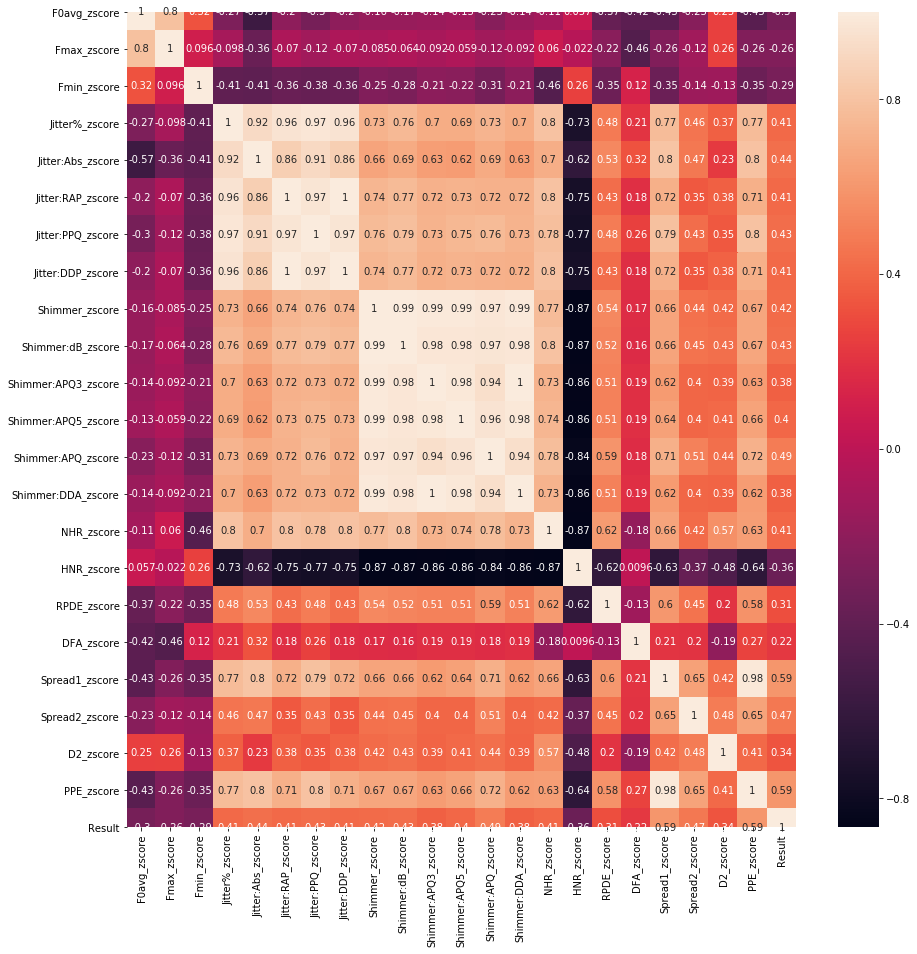

In [36]:
import seaborn as sns 

plt.figure(figsize = (15,15))

# generating correlation heatmap 
sns.heatmap(dfZ.corr(method = 'spearman'), annot = True) 
# posting correlation heatmap to output console  
plt.show()

In [37]:
dfZ=dfZ.loc[:, dfZ.columns.intersection(['PPE_zscore','Spread1_zscore','Shimmer:APQ_zscore','Spread2_zscore','Jitter:Abs_zscore','Jitter:PPQ_zscore','Shimmer:dB_zscore','Shimmer_zscore','Result'])]
dfZ

,Jitter:Abs_zscore,Jitter:PPQ_zscore,Shimmer_zscore,Shimmer:dB_zscore,Shimmer:APQ_zscore,Spread1_zscore,Spread2_zscore,PPE_zscore,Result
0,0.749759,0.760800,0.745985,0.739536,0.332985,0.801323,0.480477,0.868886,1
1,1.037674,1.276809,1.681731,1.768464,1.159454,1.479853,1.311185,1.803605,1
2,1.325589,1.585687,1.202693,1.027636,0.699187,1.141445,1.017682,1.402661,1
3,1.325589,1.284076,1.340396,1.207698,0.806859,1.440945,1.293840,1.806954,1
4,1.901418,2.047187,1.836448,1.552389,1.216839,1.780940,0.096195,2.267082,1
5,1.037674,1.473037,0.919842,0.893875,0.493901,1.325656,0.872692,1.682354,1
6,-0.401899,-0.518319,-0.724625,-0.731832,-0.625412,0.046050,0.374697,0.057898,1
7,-0.401899,-0.590996,-0.746424,-0.762700,-0.681615,-0.444365,-0.514347,-0.476111,1
8,0.461845,-0.045917,-0.466763,-0.469455,-0.408886,0.170790,1.217174,0.278339,1
9,0.461845,-0.045917,-0.070666,-0.140198,0.021210,0.618459,1.195861,0.721013,1


In [38]:
X1 = np.array(dfZ[[col for col in dfZ if col not in ['Result']]])
y1 = np.array(dfZ['Result'])

In [39]:
# preprocess dataset, split into training and test part 
#X = StandardScaler().fit_transform(X)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.3, random_state=42)
print("X1_train shape: ",X1_train.shape) 
print("y1_train shape: ",y1_train.shape) 
print("X1_test shape: ",X1_test.shape) 
print("y1_test shape: ",y1_test.shape)

X1_train shape:  (136, 8)
y1_train shape:  (136,)
X1_test shape:  (59, 8)
y1_test shape:  (59,)


In [41]:
# Explore different types of classifiers

import sys
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

def metrics(actual, prediction):
    accuracy = accuracy_score(actual, prediction)
    recall = recall_score(actual, prediction)
    precision = precision_score(actual, prediction)
    f1score = f1_score(actual, prediction)
    print ('accuracy: {}, recall: {}, precision: {}, f1-score: {}'.format(accuracy, recall, precision, f1score))
    
# iterate over classifiers
for name, clf in zip(names, classifiers):
    clf.fit(X1_train,y1_train)
    print (name," : ")
    # make predictions
    expected = y1_test
    predicted = clf.predict(X1_test)   
    # summarize the fit of the model
    print(metrics.classification_report(expected, predicted))
    print(metrics.confusion_matrix(expected, predicted))
    cm = metrics.confusion_matrix(expected, predicted)
    print("\n")

Nearest Neighbors  : 


AttributeError: 'function' object has no attribute 'classification_report'

In [ ]:
# Despite using only 8-9 factors, on an average, got much better classification 